In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 1) Import Data

In [2]:
df = pd.read_csv('carData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Nous pouvons voir les données sur les voitures, nous avons 9 variables à disposition (features)

### 2) Explore data

Comme expliqué dans le read.me, nous allons modifier les données pour qu'elles soient plus cohérentes pour notre projet.

In [3]:
df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000
df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission'] = df['Transmission'].replace({'Manual': 0, 'Automatic': 1})

/tmp/ipykernel_43070/3624401349.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
/tmp/ipykernel_43070/3624401349.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
/tmp/ipykernel_43070/3624401349.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


- Moyenne, médiane, quartile

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4661.295681,7628.471761,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5082.811556,8644.115402,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,100.000000,320.000000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,900.000000,1200.000000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3600.000000,6400.000000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6000.000000,9900.000000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35000.000000,92600.000000,500000.000000,2.000000,1.000000,1.000000,3.000000


Variables Continues :

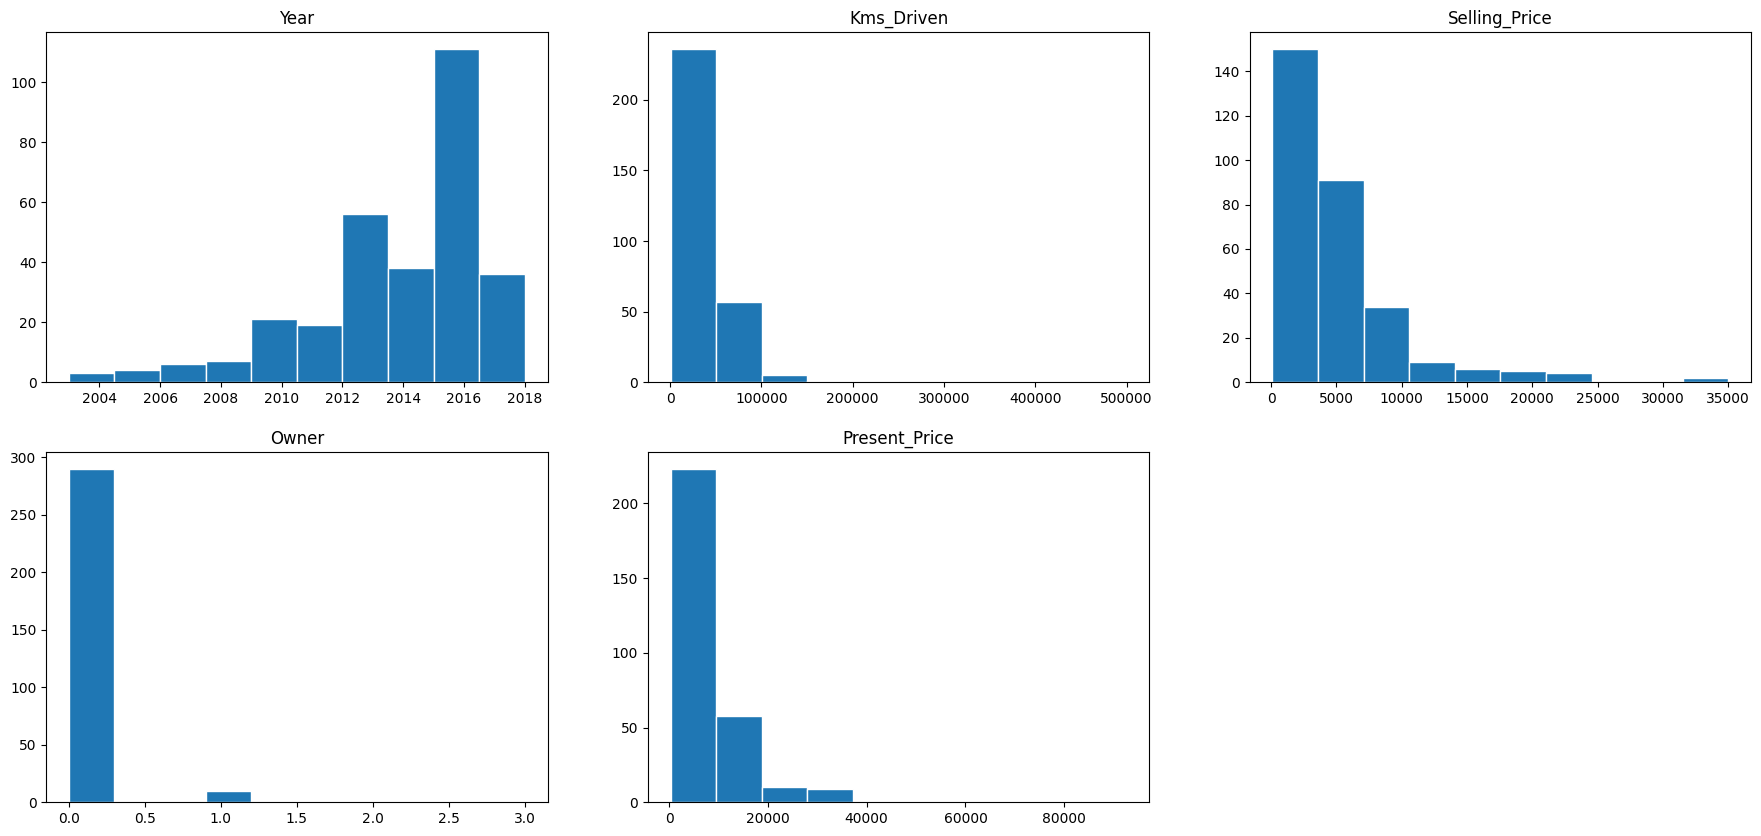

In [ ]:
plt.figure(figsize=(22, 10))

cols = ['Year','Kms_Driven','Selling_Price','Owner', 'Present_Price']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col], bins=10, edgecolor='white')
    plt.title(col)

plt.show()

Variables Discrètes :

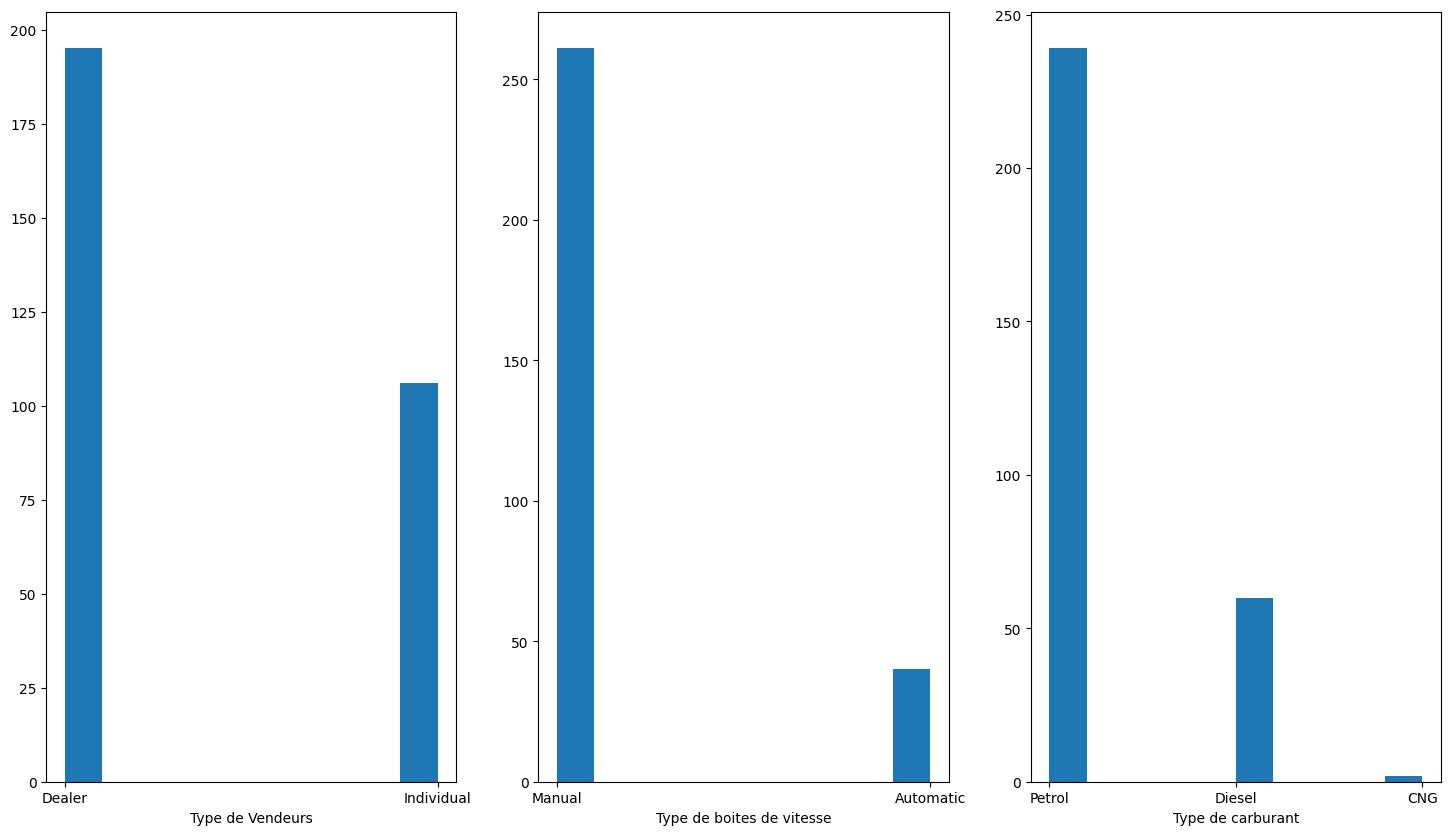

In [58]:
plt.figure(figsize=(18, 10))
plt.subplot(1,3,1)
plt.hist(df['Seller_Type'])
plt.xticks([0, 1], ['Dealer', 'Individual'])
plt.xlabel('Type de Vendeurs')

plt.subplot(1,3,2)
plt.hist(df['Transmission'])
plt.xticks([0, 1], ['Manual', 'Automatic'])
plt.xlabel('Type de boites de vitesse')

plt.subplot(1,3,3)
plt.hist(df['Fuel_Type'])
plt.xticks([0, 1, 2], ['Petrol', 'Diesel', 'CNG'])
plt.xlabel('Type de carburant')

plt.show()


### 3) Catplot

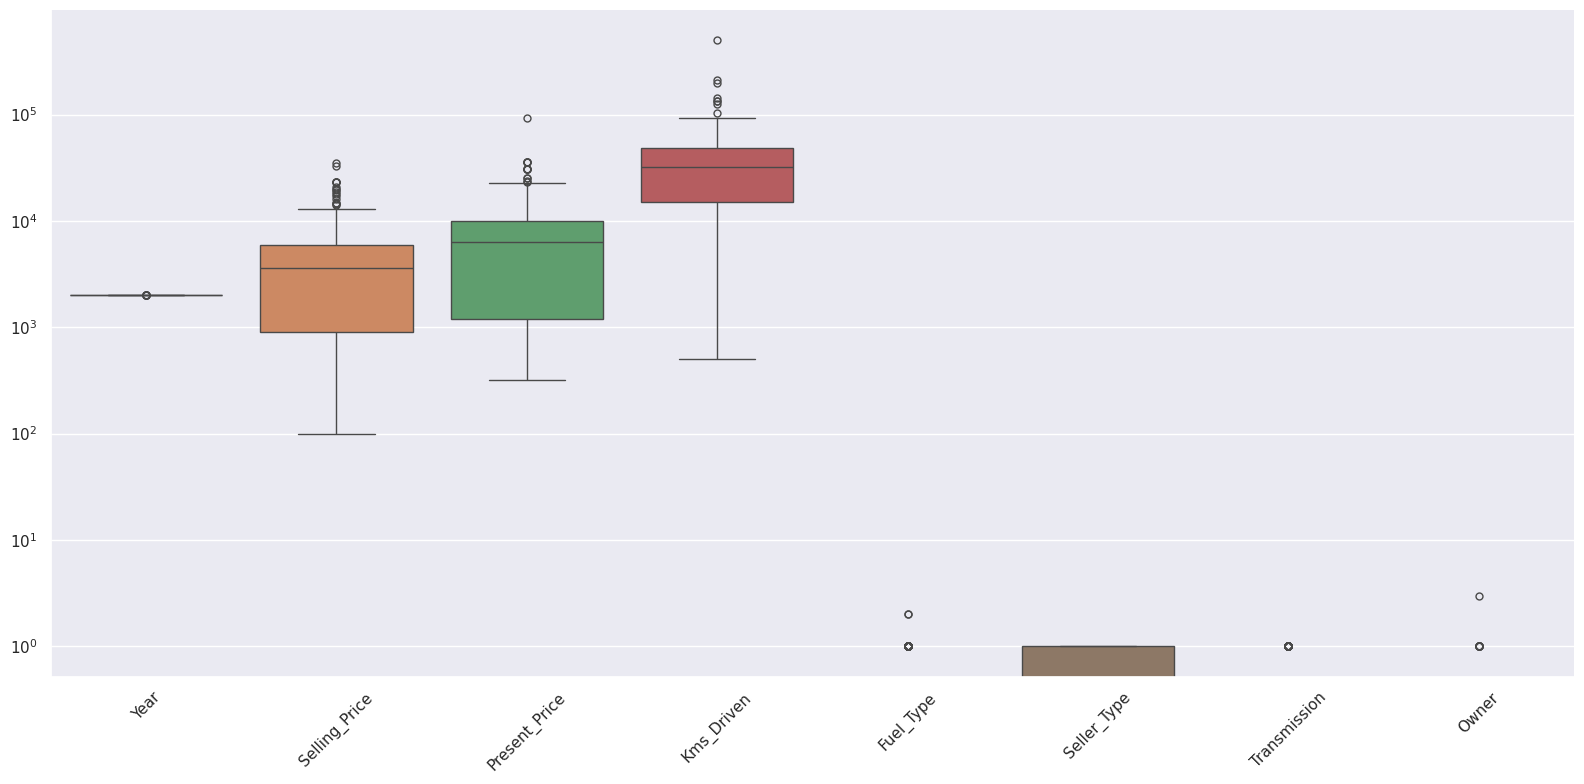

In [72]:

sns.catplot(data=df, kind="box", height=8, aspect=2)  # plus large et plus haut
plt.yscale('log')
plt.xticks(rotation=45)  # rotation des noms de colonnes

plt.tight_layout()
plt.show()


### 4) Corrélations

- Relation entre l'age et le prix de vente

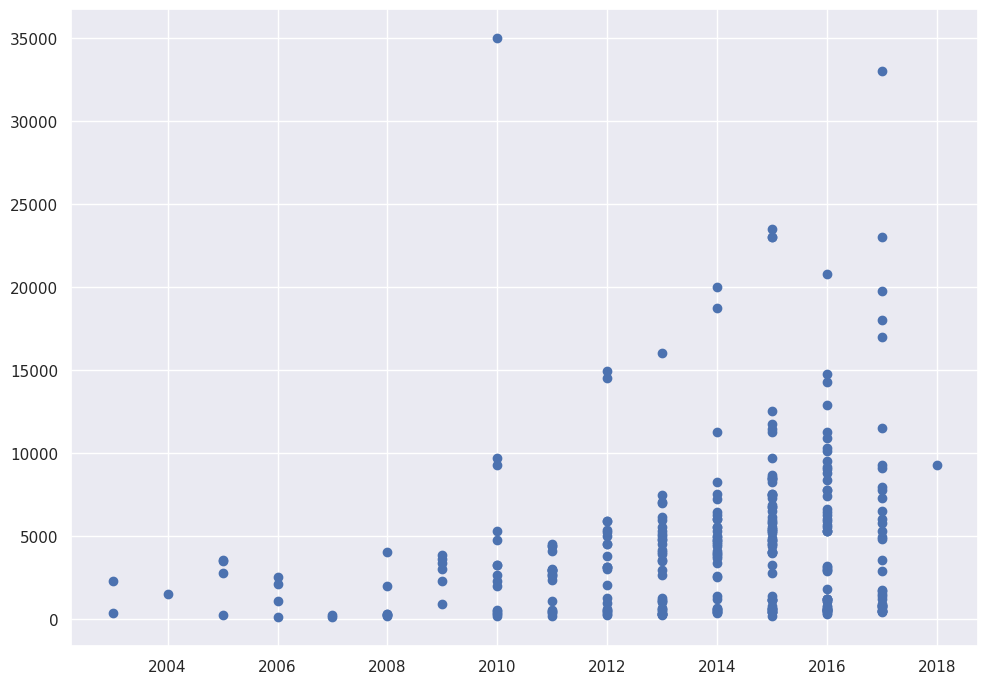

In [81]:
plt.scatter(df['Year'], df['Selling_Price'])

La veille est disponible sur le readme.

Nos données ont été préalablement transformés (les objets en classes) et nous avons des variables intéréssantes pour faire une régréssion linéaire

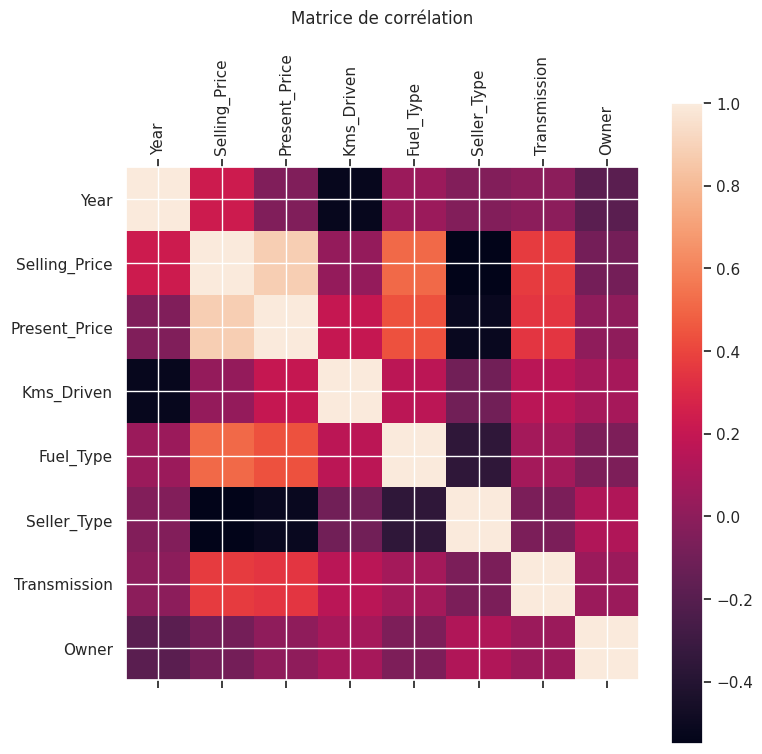

In [86]:
corr = df.corr(numeric_only=True)

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Matrice de corrélation", pad=20)
plt.show()


Il y a une grande corrélation entre Prensent Price et Le Selling Price.

### 5) Linear Regression

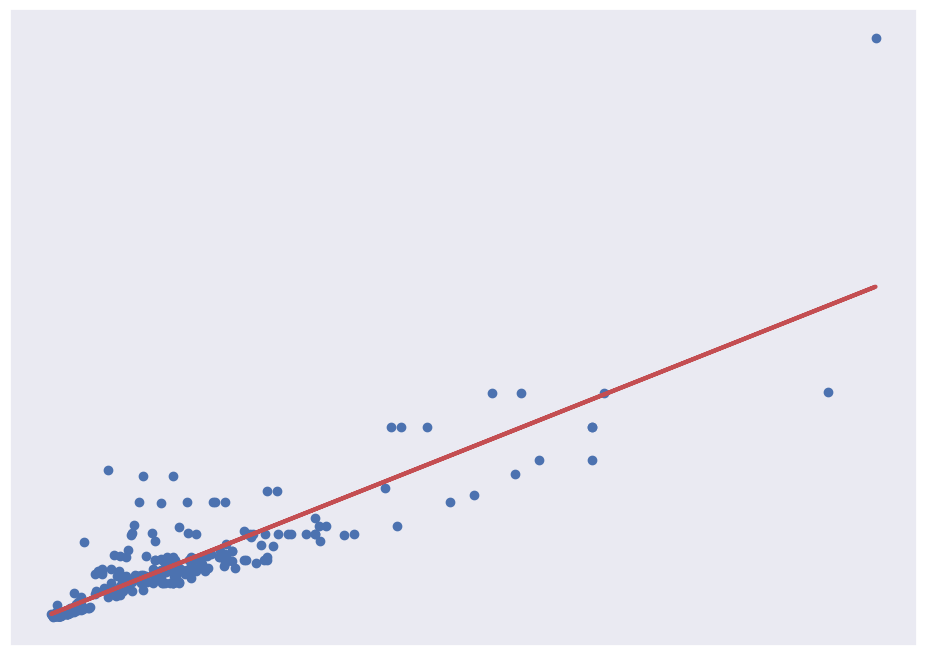

In [118]:
x = df['Selling_Price'].values
y = df['Present_Price'].values
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

model = LinearRegression()
model.fit(x, y)
model.score(x,y)

predictions = model.predict(x)

plt.scatter(x, y)
plt.plot(x, predictions, color='r', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

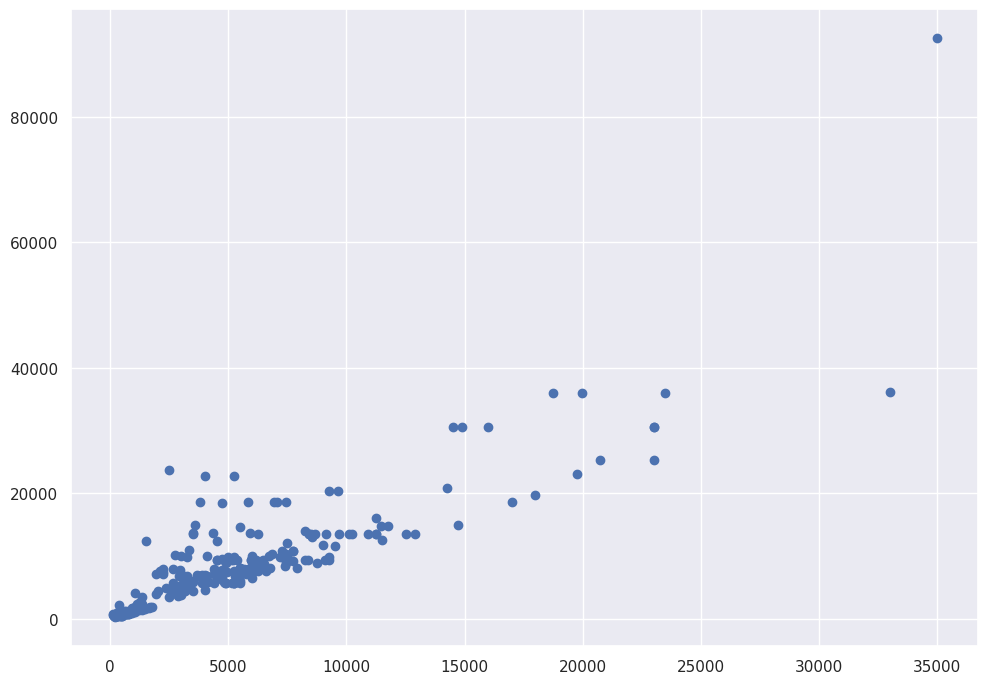

In [112]:
x = df['Selling_Price'].values
y = df['Present_Price'].values
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

plt.scatter(x, y)